# **Practical Data Science Project - ExtraaLearn Project**

--------------------------------
## **Context** 
-------------------------------

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education.

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like:

- The customer interacts with the marketing front on social media or other online platforms.
- The customer browses the website/app and downloads the brochure.
- The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

----------------------------
## **Objective**
----------------------------- 

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers.
- Find the factors driving the lead conversion process.
- Create a profile of the leads who are likely to convert.

--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

----------------------------
## **Student:** Nicolle Chuquilin
----------------------------- 


## **Importing the necessary libraries and overview of the dataset**

In [5]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

### **Loading the data**

In [6]:
df = pd.read_csv("ExtraaLearn.csv")

In [7]:
data = df.copy()

### **The first and the last 5 rows of the dataset**

In [8]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [9]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### **Replacing Yes/No values with 1/0**

In [10]:
#Yes/No values refer to 1/0 values. let's replace them so all Yes/No values show 1/0
df = df.replace({'Yes':1, 'No':0})
df

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,1,0,1,0,0,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,0,0,0,1,0,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,0,0,1,0,0,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,0,0,0,0,0,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,0,0,0,1,0,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,0,0,0,0,0,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,0,0,0,0,0,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,1,0,0,0,0,0


### **Checking the info and shape of the data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   int64  
 10  print_media_type2      4612 non-null   int64  
 11  digital_media          4612 non-null   int64  
 12  educational_channels   4612 non-null   int64  
 13  referral               4612 non-null   int64  
 14  status                 4612 non-null   int64  
dtypes: f

In [12]:
df.shape

(4612, 15)

**Observations:**

* The dataset has **4612 rows and 15 columns**. 

* `ID`, `current_occupation`, `first_interaction`, `profile_completed`, and `last_activity` are of **object type** while the rest of the columns are numeric in nature.

* There are **no null values** in the dataset.

* **ID column is an identifier**. Let's check if each entry of the column is unique.

### **Checking duplicates**

In [13]:
#Checking for duplicates
df.duplicated().sum()

0

In [14]:
df.ID.nunique()

4612

**Observations:**
- No duplicated values
- We can see that **all the entries of the ID column are unique**. Hence, this column would not add any value to our analysis.
- Let's drop the ID column.

### **Dropping the ID column**

In [15]:
df = df.drop(["ID"], axis = 1)

In [16]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,1,0,1,0,0,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,0,0,0,1,0,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,0,0,1,0,0,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,0,0,0,0,0,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,0,0,0,0,0,0


## **Exploratory Data Analysis and Data Preprocessing**

##### **Univariate Analysis**

### **Summary Statistics for numerical columns**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
print_media_type1,4612.00000,0.10776,0.31011,0.00000,0.00000,0.00000,0.00000,1.00000
print_media_type2,4612.00000,0.05052,0.21904,0.00000,0.00000,0.00000,0.00000,1.00000
digital_media,4612.00000,0.11427,0.31817,0.00000,0.00000,0.00000,0.00000,1.00000
educational_channels,4612.00000,0.15286,0.35989,0.00000,0.00000,0.00000,0.00000,1.00000
referral,4612.00000,0.02016,0.14058,0.00000,0.00000,0.00000,0.00000,1.00000
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations:**

* The age range goes from 18 to 63, with the mean being 46 years old. 75% of the leads are at least 36 years old.
* Leads visit the website on average 4 times, at least 0 times and at most 30 times. 75% of the leads have visited the website at most 5 times. 
* The average time leads spent on the website is 724 minutes. Ranging from 0 to 2537 minutes. 75% of the leads have spent on the website at least 149 minutes. However, only 25% have spent at least 1337 minutes on the website.
* The average number of pages on the website viewed during the visits is 3. 75% of the leads view a maximum of 4 pages. 25% of the leads view from 4 pages to 18 pages. 
* At least 75% of the leads had not seen the ad of ExtraaLearn in the Newspaper. 
* At least 75% of the leads had not seen the ad of ExtraaLearn in the Magazine. 
* At least 75% of the leads had not seen the ad of ExtraaLearn on the digital platforms.
* At least 75% of the leads had not had heard about ExtraaLearn in the education channels
* At least 75% of the leads had not heard about ExtraaLearn through reference.
* At least 50% of the leads were converted to a paid customer.

### **Checking the distribution and outliers for numerical columns in the data**

age
Skew : -0.72


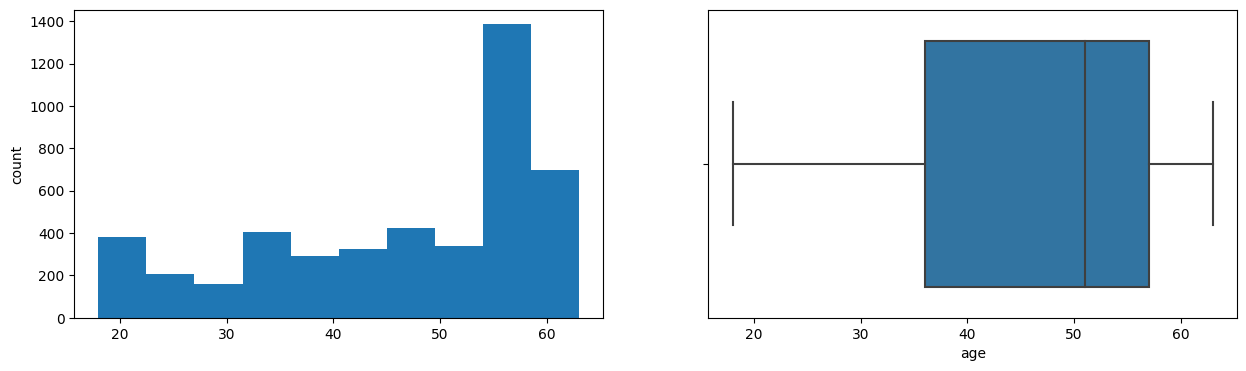

website_visits
Skew : 2.16


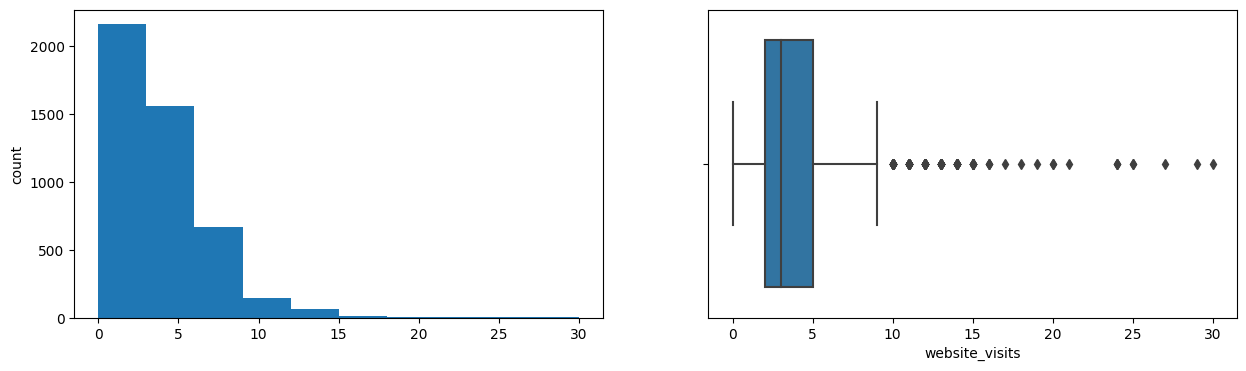

time_spent_on_website
Skew : 0.95


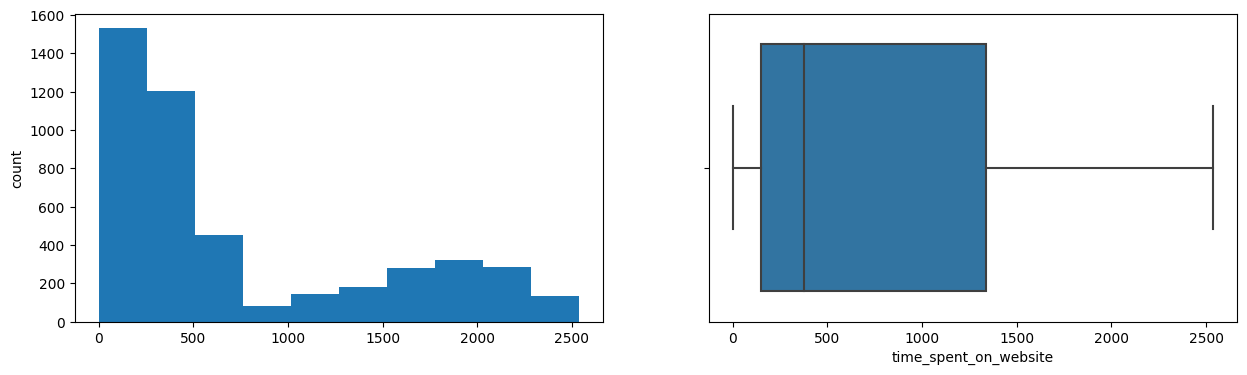

page_views_per_visit
Skew : 1.27


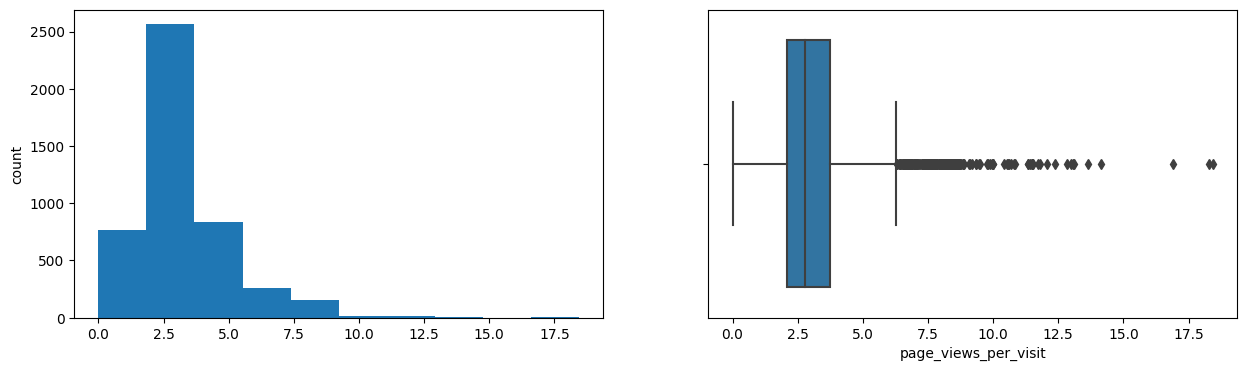

In [18]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

In [19]:
df[df["website_visits"] == 0].shape

(174, 14)

In [20]:
df[df["time_spent_on_website"] == 0].shape

(174, 14)

In [21]:
df[df["page_views_per_visit"] == 0].shape

(181, 14)

In [22]:
df[(df["page_views_per_visit"] == 0) & (df["website_visits"] > 0)]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
2116,57,Professional,Mobile App,Medium,7,80,0.00000,Phone Activity,0,0,0,1,0,0
2156,51,Unemployed,Website,Medium,3,1,0.00000,Email Activity,0,0,0,0,0,0
2632,59,Professional,Website,Medium,3,1,0.00000,Email Activity,0,0,0,0,0,0
3115,60,Unemployed,Website,Medium,9,230,0.00000,Email Activity,0,0,0,0,0,0
3454,57,Professional,Website,Medium,7,1802,0.00000,Email Activity,0,0,0,1,0,1
4203,34,Unemployed,Mobile App,Medium,1,1,0.00000,Email Activity,0,0,0,0,0,0
4204,30,Professional,Mobile App,Medium,4,1991,0.00000,Email Activity,1,0,0,0,0,0


- The distribution of **age** is left skewed implying that the majority of leads are at least 46 years old.
- **Very few leads visited the website more than 10 times**. Some leads have visited it more than 25 times.
- **The distribution of time spent on website is skewed to right**. The median time spent is around ~400 minutes. A few spent more than 2000 minutes in the website. 
- **Very few leads have visited more than 6 pages**. Some leads have visited more than 15 pages.
- **174 leads have not visited the website**, and therefore have spent 0 minutes on it.
- 181 Leads have visited 0 pages when they visited the website. However, only 174 leads have not visit the website. Further investigation has to be done on those 7 leads.

### **Summary Statistics for categorical columns**

##### **Let's check the percentage of each category for categorical variables.**

In [23]:
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

#function
for col in cat_col:
    print(df[col].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
****************************************
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
****************************************
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
****************************************


##### **Let's visualize the data seen above of the categorical columns**

In [24]:
def labeled_barplot(df, feature, perc=False, n=None):

    total = len(df[feature])  
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show()  

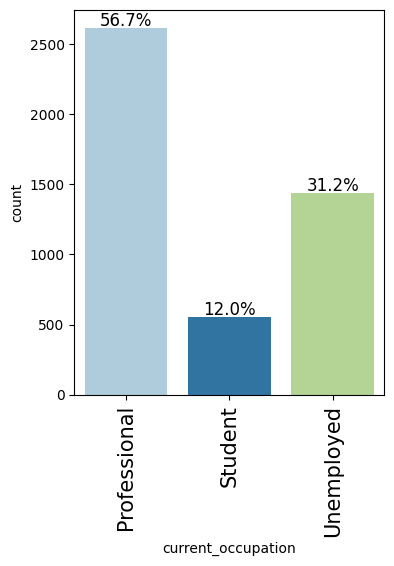

In [25]:
#Current Ocupation
labeled_barplot(df, "current_occupation", perc=True)

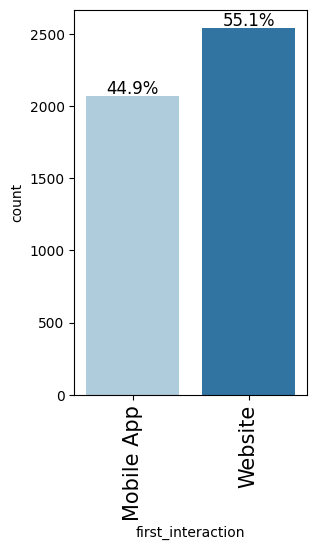

In [26]:
#First Interaction
labeled_barplot(df, "first_interaction", perc=True)

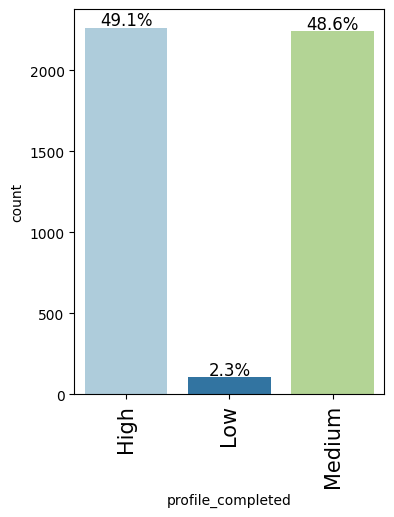

In [27]:
#Profile Completed
labeled_barplot(df, "profile_completed", perc=True)

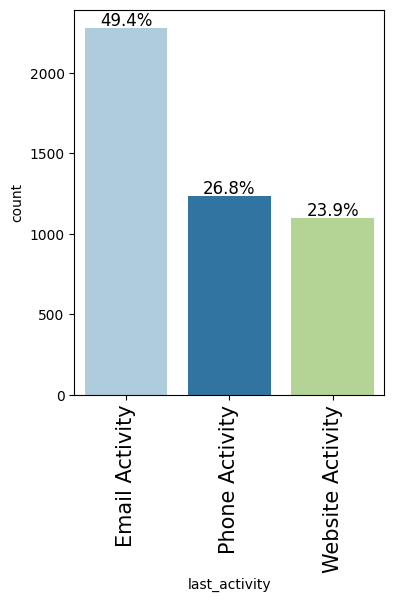

In [28]:
#Last Activity
labeled_barplot(df, "last_activity", perc=True)

**Observations:**
* ~57% of the leads are Professionals, while the rest are either Unemployed (~31%) or Students (~12%).
* Most of the leads first interaction (~55%) was through the website, followed by the mobile app (~45%).
* Almost all of the leads have filled their profile at least in a medium level (high(~49%), medium(~49%)). Only ~2% of leads profile have been filled in a low level. 
* ~49% leads last activity was email activity, followed by ~26% of phone activity and ~24% of website activity. 

#### **Bivariate analysis.**

In [29]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [30]:
def stacked_barplot(df, predictor, target):

    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 6, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. **Let's check how current occupation affects lead status.**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


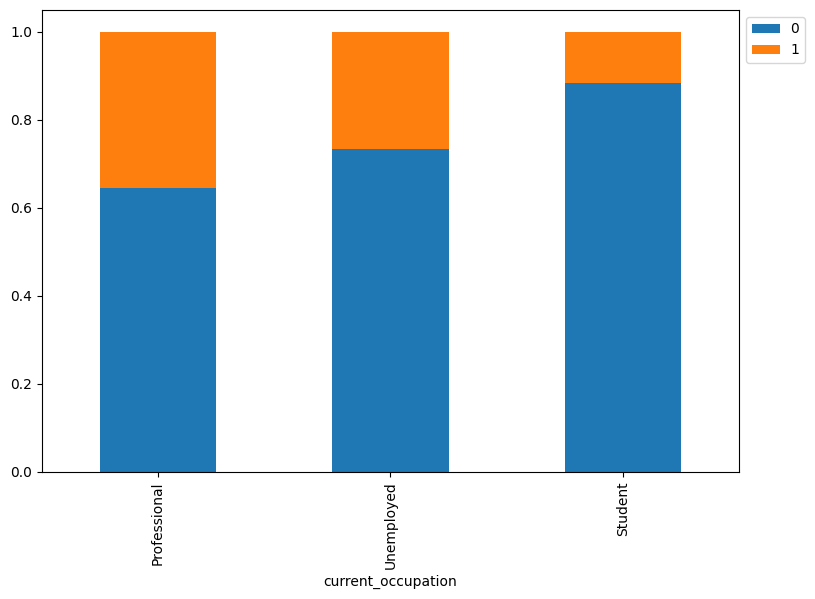

In [31]:
stacked_barplot(df, "current_occupation", "status")

**Observations:**

* **Unemployed and Professional leads tend more to convert to paid customers than Student leads.**
* ~36% of the Professional leads get enrolled into the program.
* ~27% of the Unemployed leads get enrolled into the program.
* Only ~12% of the Student leads get into the program.
* Therefore, ExtraLearn should focus more on Professional and Unemployed leads, rather than Student leads.

The company's first impression on the customer must have an impact. **Do the first channels of interaction have an impact on the lead status?** 

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


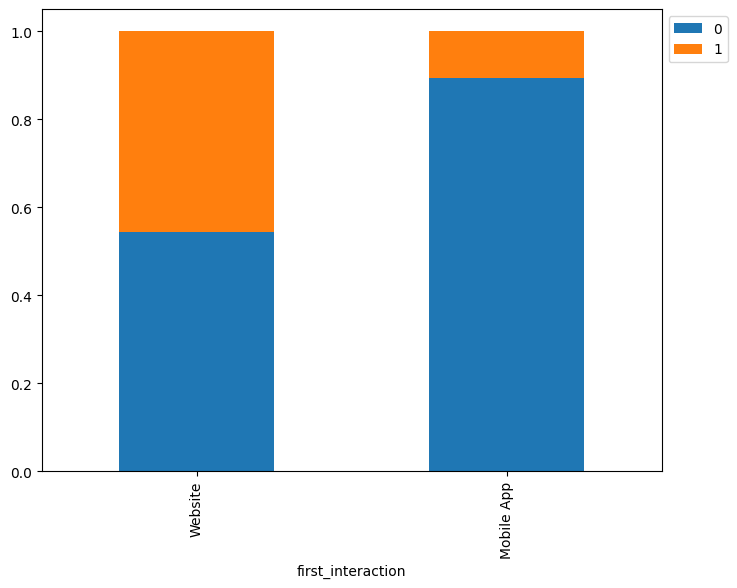

In [32]:
stacked_barplot(df, "first_interaction", "status")

**Observations:**

* **Leads who initially engage with the program through the website exhibit a significantly higher conversion rate compared to those who first interact with the mobile app.**
* Approximately 46% of leads who initially engage with the program through the website successfully enrolled into the program.
* In contrast, only around 10% of leads who first interact with the program through the mobile app proceed to enrolled.
* A further analysis of why this may occur (i.e User experience, Accessibility, Mobile App Usability, Marketing) should be done to improve the Mobile App covertion rate.

The company uses multiple modes to interact with prospects. **Which way of interaction works best?**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


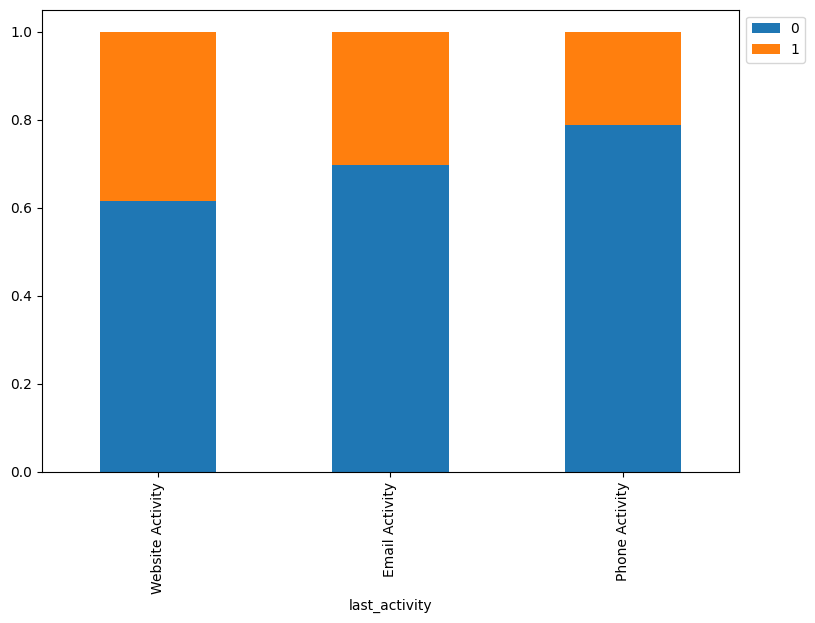

In [33]:
stacked_barplot(df, "last_activity", "status")

**Observations:**

* **Leads whose last interaction with ExtraaLearn was through the Website had a higher convertion rate than the email and phone activity ones.**
* Around 38% of the leads whose last interaction with ExtraaLearn was through the Website -  i.e Interacted on live chat with a representative, Updated profile on the website - had converted to paid customers. 
* ~30% of the leads whose last interaction with ExtraaLearn was through the Email -  i.e Seeking for details about the program through email, Representative shared information with a lead like a brochure of program- had converted to paid customers. 
* Only ~21% of the leads whose last interaction with ExtraaLearn was through the Phone -  i.e Had a Phone Conversation with a representative, Had conversation over SMS with a representative - had converted to paid customers. 

The company gets leads from various channels such as print media, digital media, referrals, etc. **Which of these channels have the highest lead conversion rate?**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
0                  2897  1218  4115
1                   338   159   497
------------------------------------------------------------------------------------------------------------------------


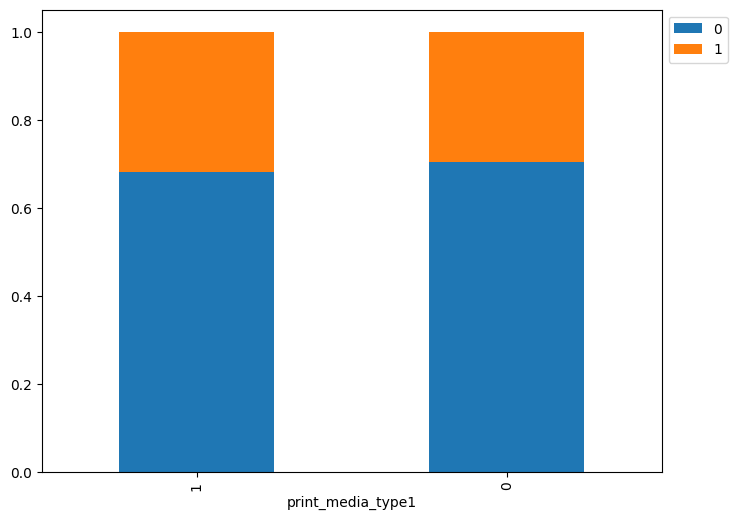

In [34]:
# Newspaper
stacked_barplot(df, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
0                  3077  1302  4379
1                   158    75   233
------------------------------------------------------------------------------------------------------------------------


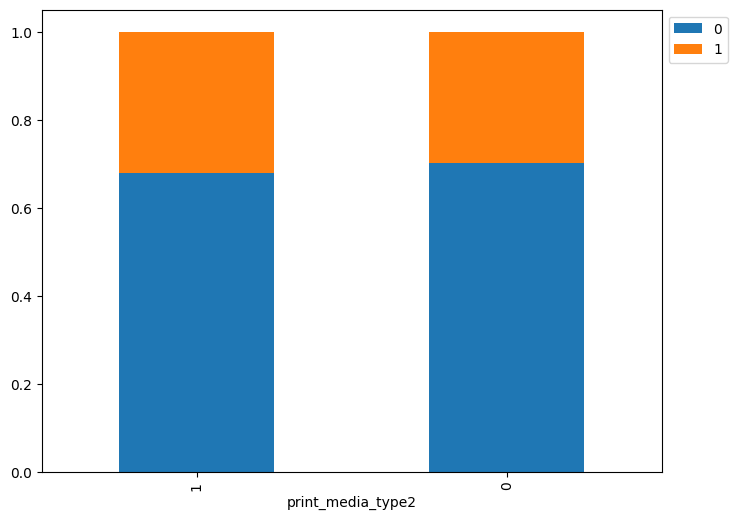

In [35]:
# Magazine
stacked_barplot(df, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
0              2876  1209  4085
1               359   168   527
------------------------------------------------------------------------------------------------------------------------


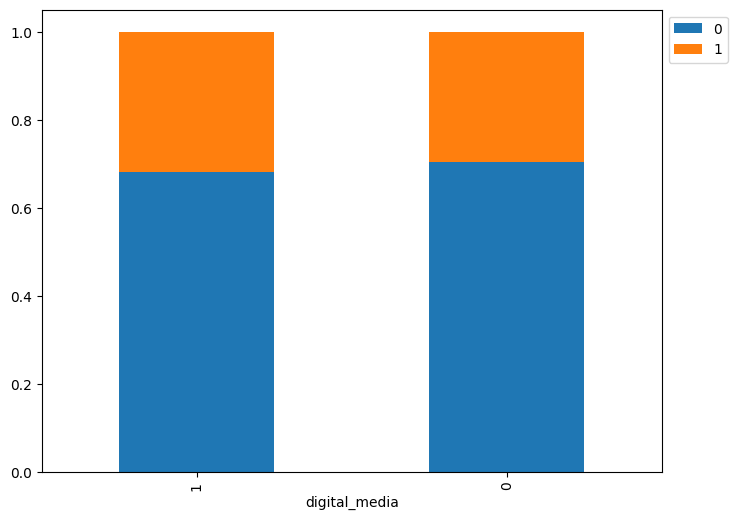

In [36]:
# Digital Media
stacked_barplot(df, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
0                     2727  1180  3907
1                      508   197   705
------------------------------------------------------------------------------------------------------------------------


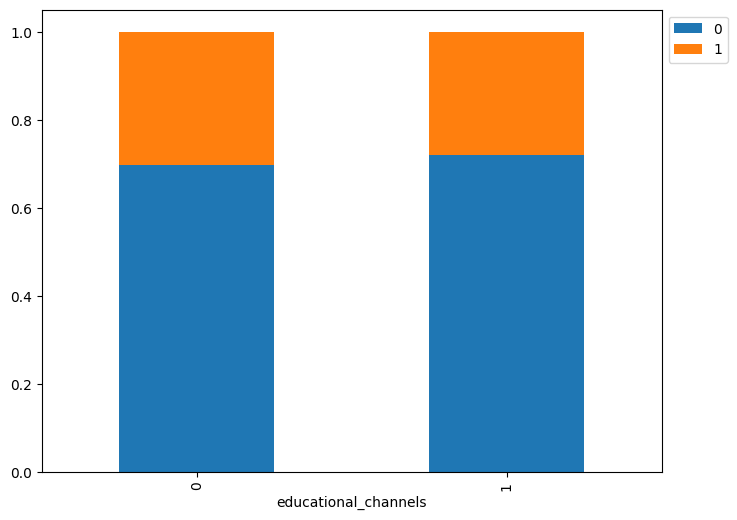

In [37]:
# Educational Channels
stacked_barplot(df, "educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
0         3205  1314  4519
1           30    63    93
------------------------------------------------------------------------------------------------------------------------


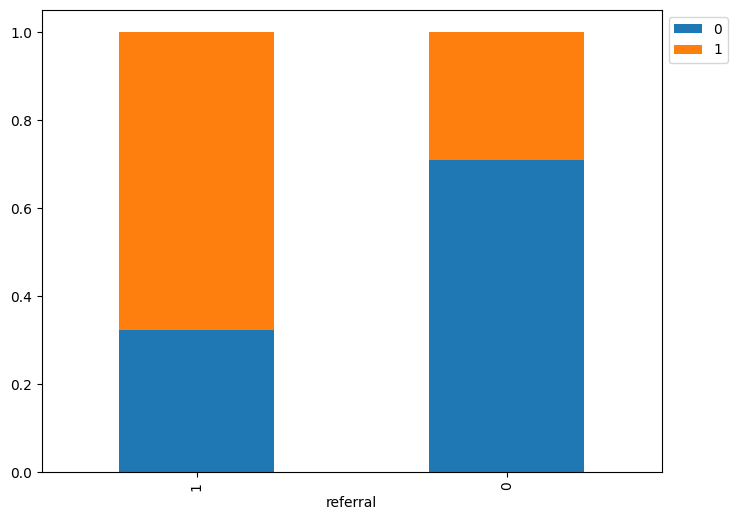

In [38]:
# Referral
stacked_barplot(df, "referral", "status")

**Observations:**

* Around 32% of the leads who had seen the ad of ExtraaLearn in the Newspaper, Magazines and Digital Media converted into paid customers
* ~28% of the leads who had heard about ExtraaLearn in the education channels -like online forums, discussion threads, educational websites- converted into paid customers.
* Remarkably, a substantial ~68% of leads who were introduced to ExtraaLearn through referrals successfully transitioned into paying customers.
* This highlights a significant trend: **leads referred to the program are notably more likely to convert into paying customers compared to those acquired through other advertising methods.**
* It is a widely recognized fact that word-of-mouth advertising remains one of the most effective and influential marketing channels, as evidenced by this remarkable conversion rate.

People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.**Does having more details about a prospect increase the chances of conversion?**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


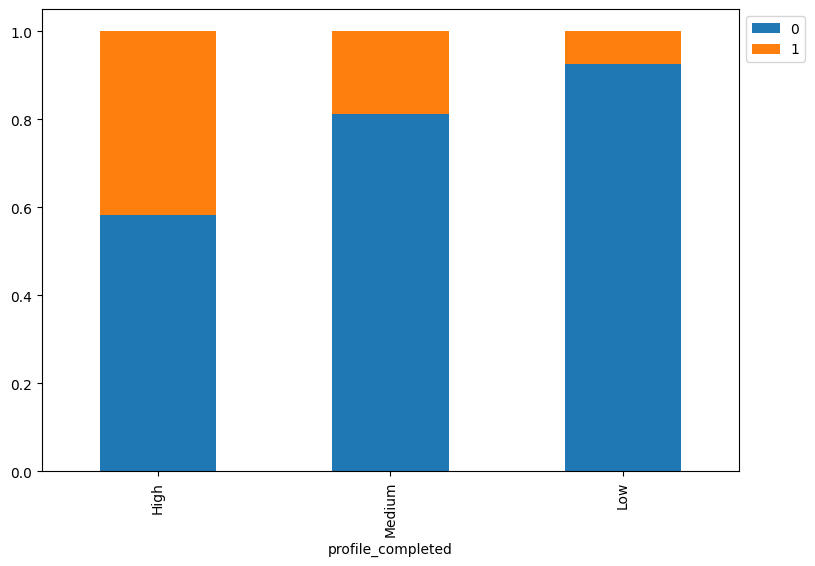

In [39]:
stacked_barplot(df, "profile_completed", "status")

**Observations:**

* **Leads who have completed their profiles at a high level exhibit a significantly higher conversion rate compared to those with medium or low profile completion.**
* Around 42% of leads with high-profile completion successfully convert into paying customers, underscoring a strong correlation between high-profile completion and a high conversion rate.
* In contrast, around 19% of leads with medium-profile completion make the transition to paying customers.
* As anticipated, the conversion rate for leads with low-profile completion is notably lower, with only about 8% successfully becoming paying customers.

**Let's check the relationship between age and current occupation.**

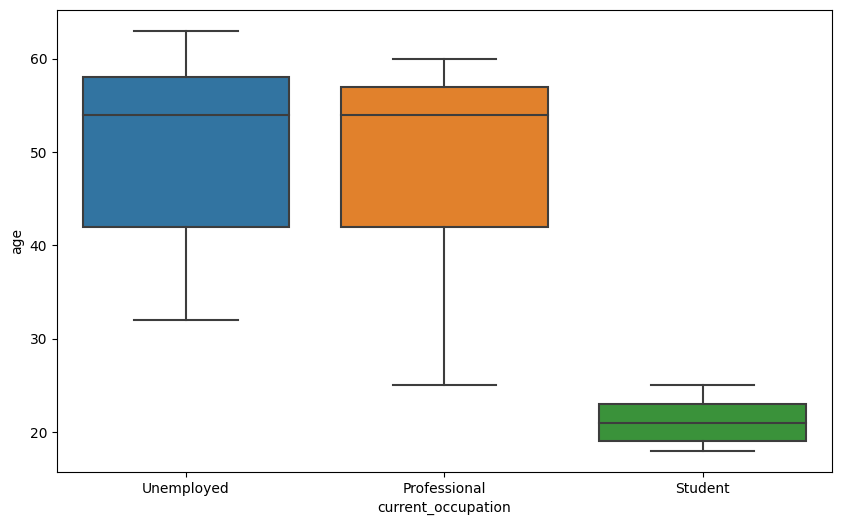

In [40]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = df, y = "age", x = "current_occupation")

plt.show()

In [41]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations:**

* **Unemployed and Professional leads have a median age of around 54 years.**
* Unemployed leads tend to be slighly older than professional leads
* As expected, student leads are around 23 years old. No student lead is more than 25 years old

**Let's check the distribution between convertion rate and the website visits, time spent on the website and page views per visit**

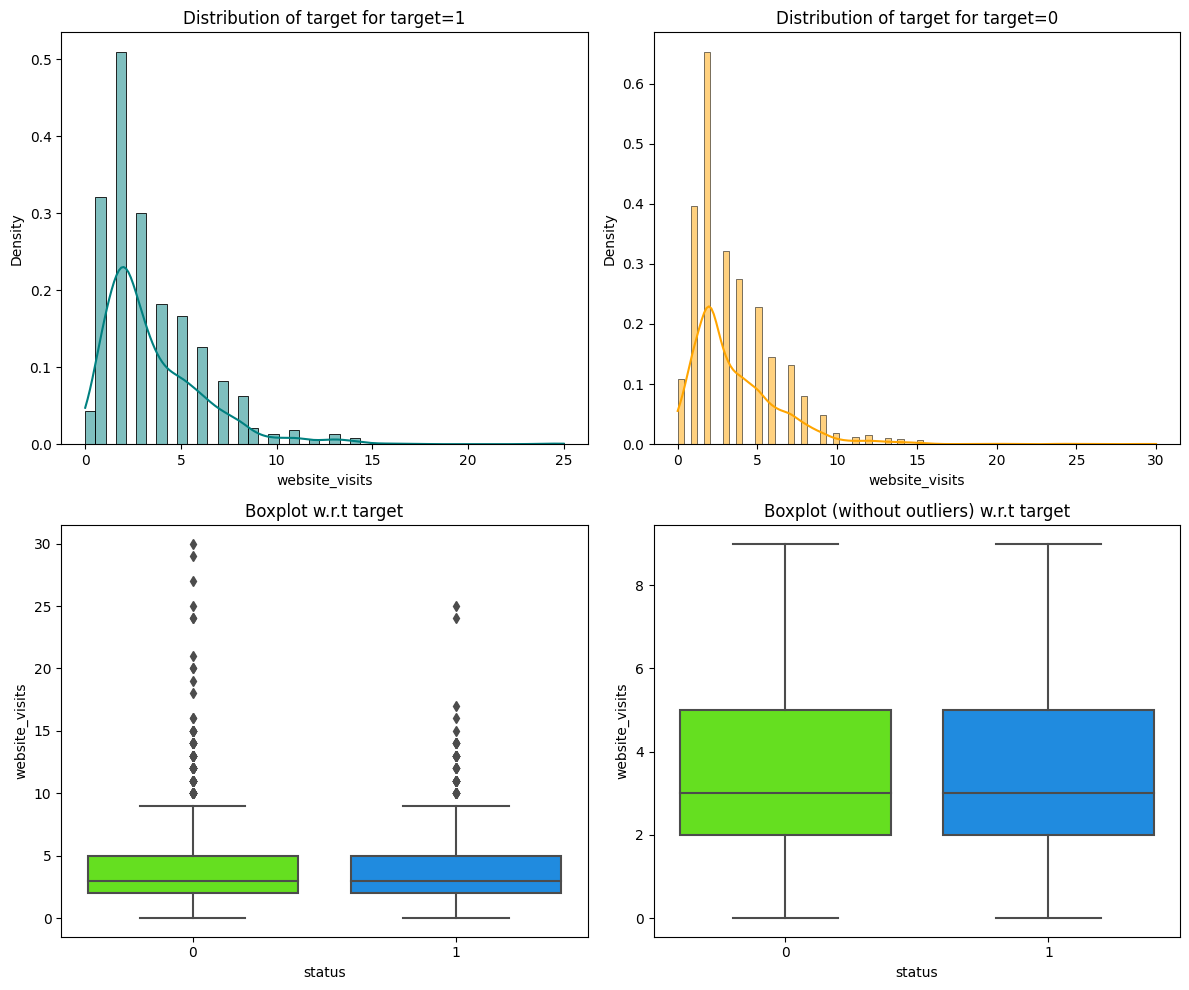

In [44]:
distribution_plot_wrt_target(df, "website_visits", "status")

In [213]:
data.groupby(["status"])["website_visits"].median()

status
0   3.00000
1   3.00000
Name: website_visits, dtype: float64

**Observations:**

* It appears that there is no distinct correlation between website visit and lead's conversion

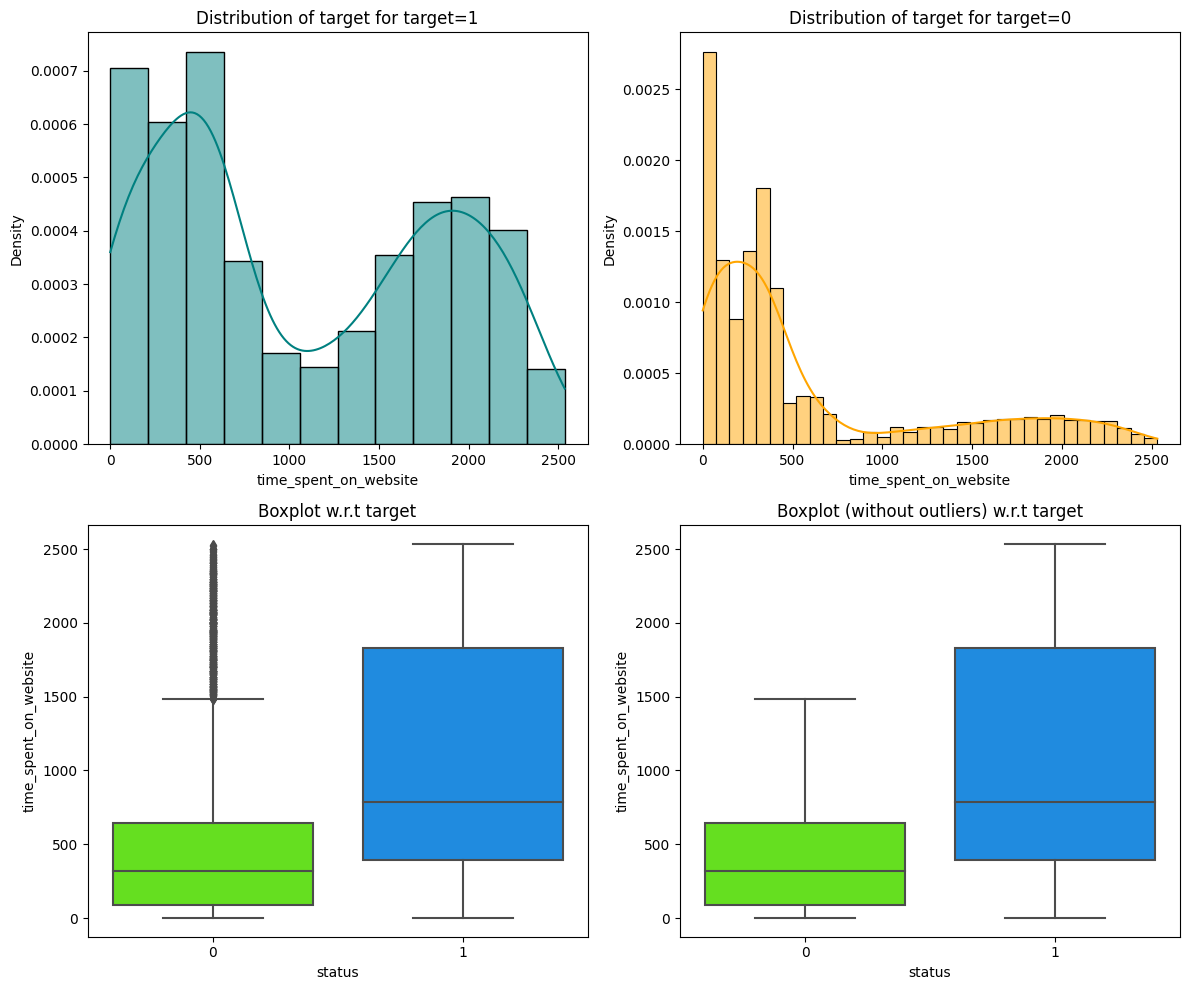

In [45]:
distribution_plot_wrt_target(df, "time_spent_on_website", "status")

In [154]:
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Observations:**
* Leads who converted to paid customers - as expected- tended to spend more time on the website than those who didn't convert.
* The median of not converted leads is 317 minutes, while of the ones who converted is 789 minutes.

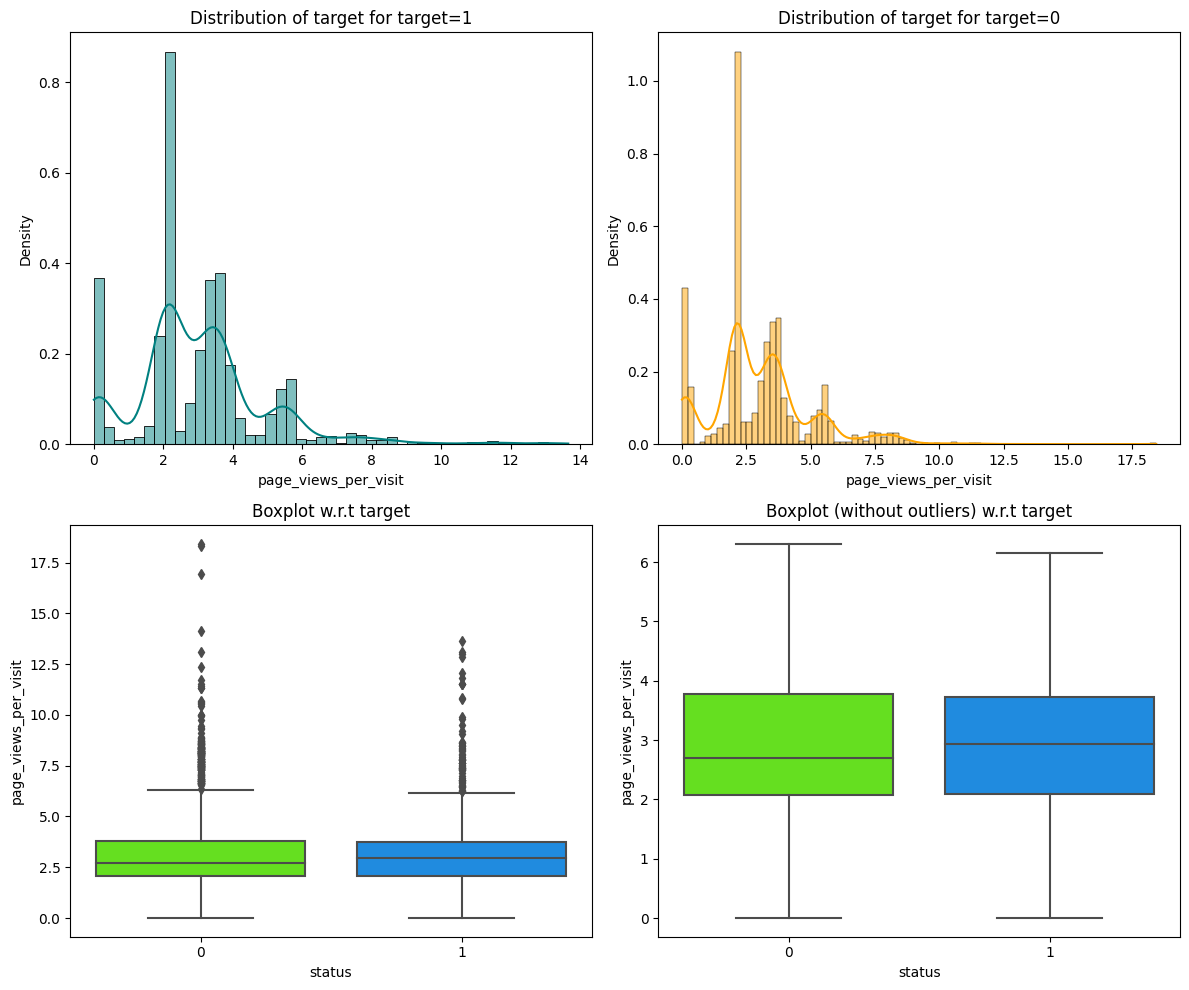

In [46]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

In [212]:
data.groupby(["status"])["page_views_per_visit"].median()

status
0   2.70600
1   2.93500
Name: page_views_per_visit, dtype: float64

**Observations:**

* It appears that there is no distinct correlation between page views per visit and lead's conversion.

**Let's check the relationship between age and profile completition.**

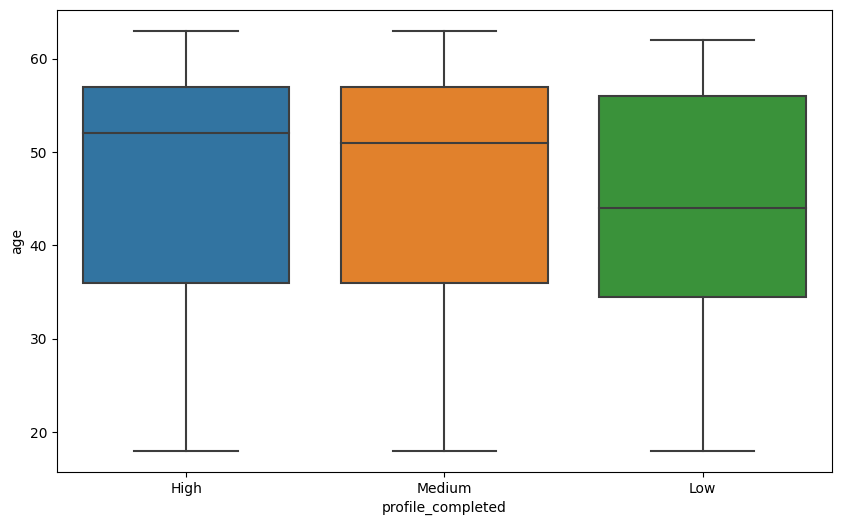

In [155]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = df, y = "age", x = "profile_completed")

plt.show()

**Observations:**

* Younger leads tend to slightly have a lower level of profile completition than older leads.

**Let's check the relationship between current ocupation and profile completition.**

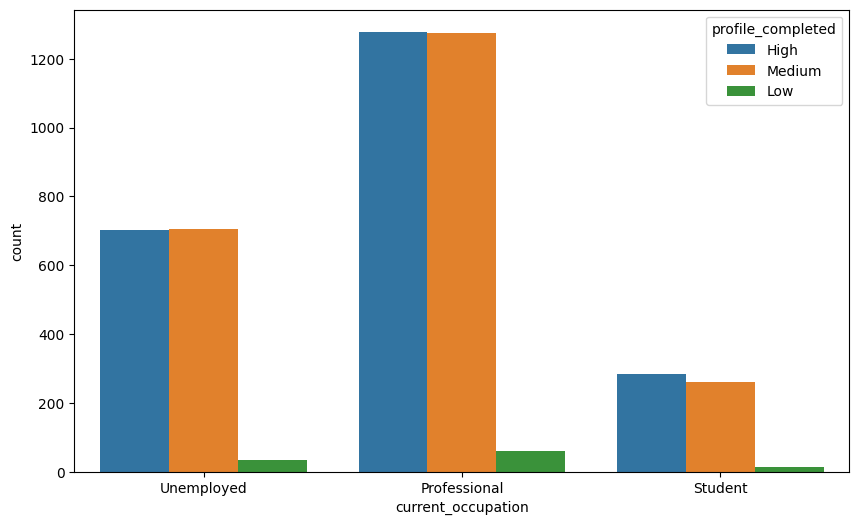

In [156]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'profile_completed', data = df)

plt.show()

**Observations:**

* Profile completition is evently distributed across ocupation, except for low completition (as expected).

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

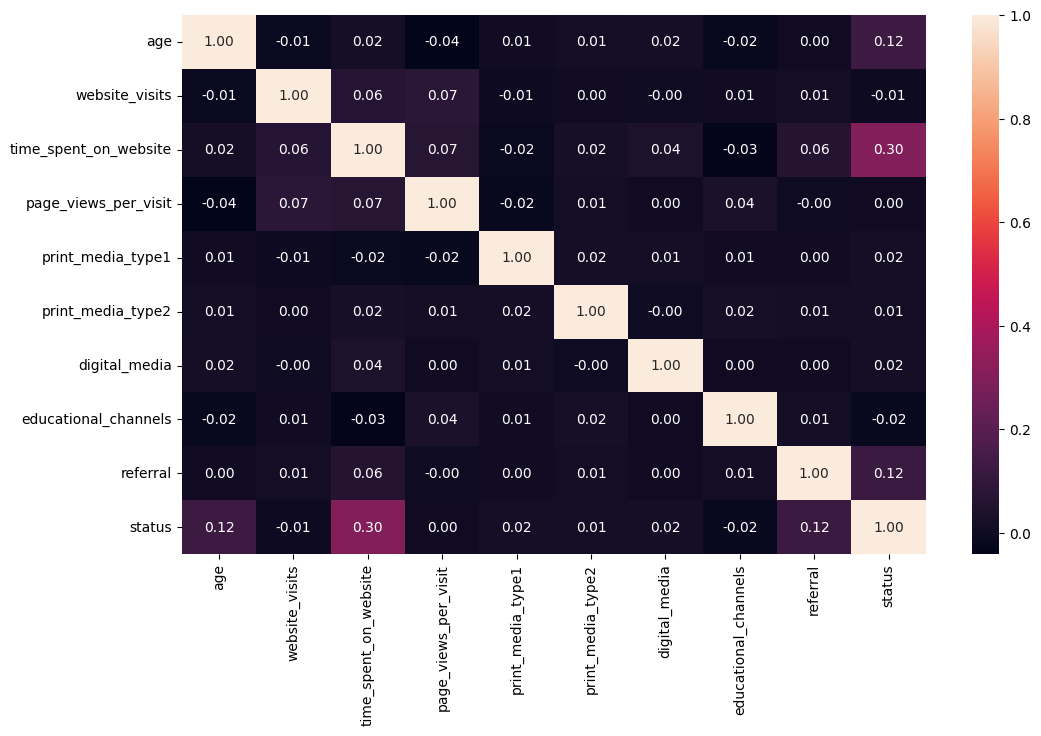

In [157]:
numerical_col = df.select_dtypes(include=['number'])

plt.figure(figsize = (12, 7))

sns.heatmap(numerical_col.corr(), annot = True, fmt = ".2f")

plt.show()

**Observations:**

* There's a **weak positive correlation between the time spent on the website and the lead status**. This makes sense as leads that are more interested in the course will tend to spend more time on the website.
* There's a **weak negative correlation between the lead status and the lead's age.** Meaning that the older the lead is, the higher is the chance to be enrolled in the program.
* There's a **weak negative correlation between the lead status and the referral.**. Indicating that people who have heard the program through the referral are slightly more likely to enroll into the program.

## **Data Preprocessing**

## Outlier Check

* Checking Outliers in the data

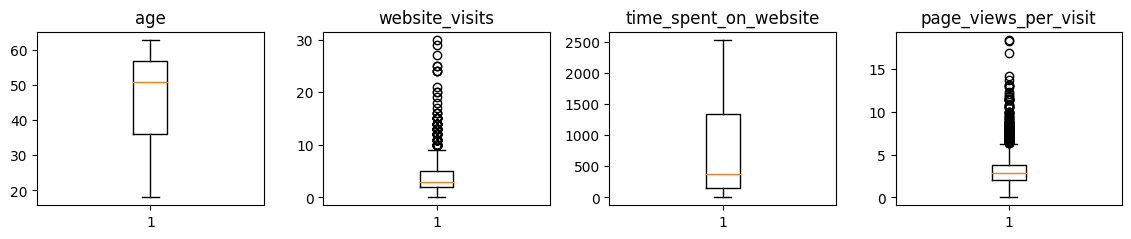

In [172]:
columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

plt.figure(figsize=(20, 15))

# Loop through the numerical columns and create box plots
for i, variable in enumerate(columns):
    plt.subplot(7, 7, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* While Age and Time_spent_on_website exhibit no outliers, Website_visits and Page_views_per_visit display a notable number of outlier data points.
* We are not removing them as they represent valuable data for our analysis

## Preparing the data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [173]:
# Separating the target variable and other variables
X = df.drop(columns = 'status')
Y = df['status']

In [174]:
#Creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [175]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [176]:
# Summary of the training and test data set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## Building a Decision Tree model

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will convert to a paid customer but in reality, the lead does not convert to a paid customer. (False Positives)
2. Predicting a lead will not convert to a paid customer but in reality, the lead converts to a paid customer. (False Negatives)

**Which case is more important?** 

* If we predict that a lead will convert to a paid customer but it doesn't, then the company may waste its resources on an incorrect customer target. 

* If we predict that a lead will not convert to a paid customer but it does, then we will be losing a potential customer

* Hence, the loss of a potential customer represents an even more significant loss.


**How to reduce the losses?**

* ExtraLearn would aim to maximize the `Recall` metric. A higher Recall score indicates an increased ability to reduce False Negatives, which is a crucial goal. By achieving a higher Recall, ExtraLearn can minimize the risk of losing potential customers. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [177]:
# Creating a function that generates a well-formatted classification report and computes the confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Building Decision Tree Model

In [178]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



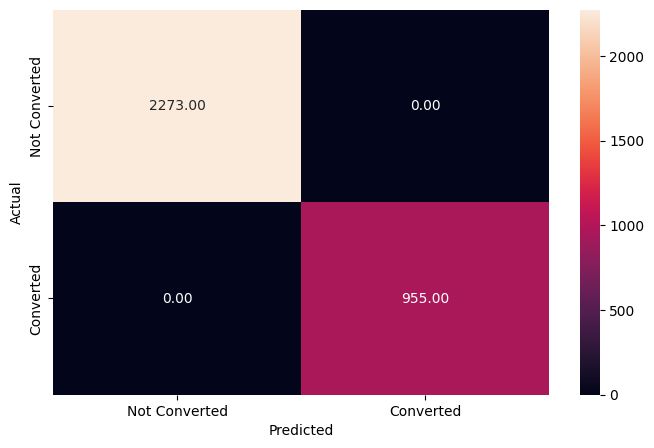

In [179]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the lead will convert into a paid customer and it does convert.
- **False Negative**: Predicting a lead will not convert to a paid customer but in reality, the lead converts to a paid customer.
- **True Negative**: Predicting a lead will not convert to a paid customer and it does not convert.
- **False Positive**: Predicting a lead will convert to a paid customer but in reality, the lead does not convert to a paid customer

**Observations:**

* The training set shows no errors, with neither False Negatives nor False Positives. The model has performed very well on the training set.

* However, there is a strong indication that our model may be suffering from overfitting. This is a known issue with decision trees, as they have the tendency to keep growing and accurately classifying every data point when left unrestricted, effectively memorizing all patterns in the training set.


## Model Performance evaluation and improvement

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.69       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



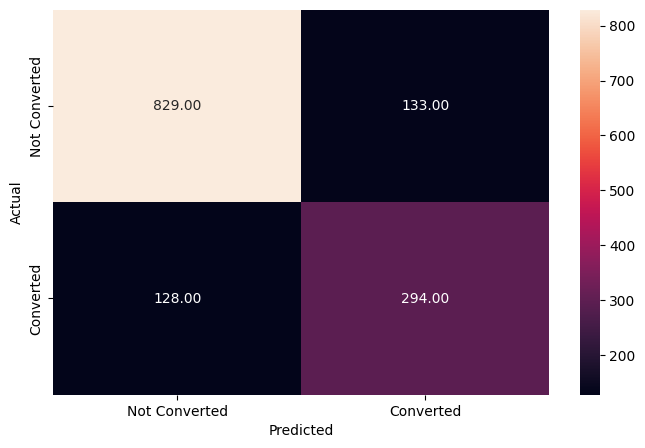

In [194]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

 * As anticipated, the decision tree model exhibits overfitting on the training data, resulting in poor generalization performance on the test set.
* Our primary objective is to enhance our Recall score.

**Let's employ hyperparameter tuning via GridSearchCV to identify the ideal max_depth parameter** in order to mitigate the model's overfitting. Additionally, we can fine-tune other hyperparameters as part of the process.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data. 

**This action would instruct the model to consider class 1 as the primary and important class.**

In [181]:
# ChoosIing the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Parameters 
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)
d_tree_tuned = grid_obj.best_estimator_
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

After tunning the model, **let's assess the model's performance on both the training and testing datasets.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



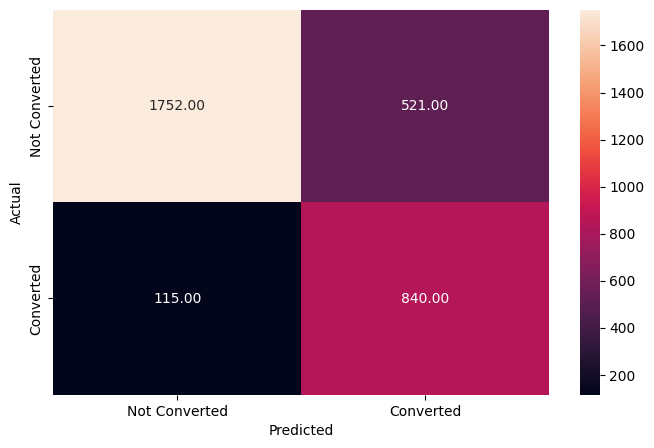

In [182]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**
* Notably, there is a  **decrease in performance on the training data**, which aligns with our goal of reducing overfitting.
* **The model was able to identify the majority of customer conversions.**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



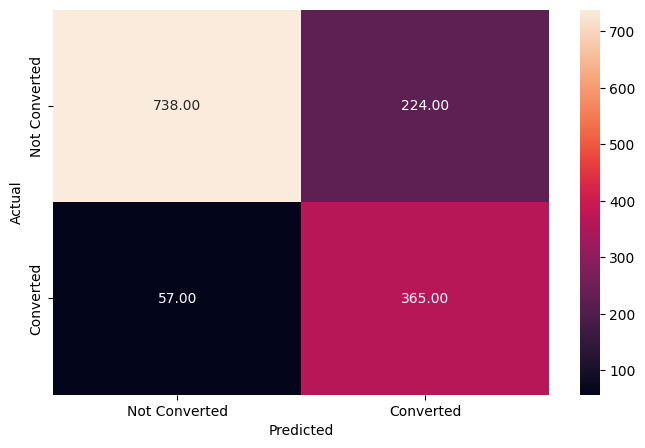

In [183]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**
* It's evident that the **Recall for class 1 has seen an increase**, albeit at the cost of a decrease in precision.
* The substantial **reduction in overfitting** is evident, with the model now exhibiting more balanced and generalized performance on both the training and testing data.
* In the test dataset, 86% of the leads who converted were accurately predicted, only 14% were wrongly predicted.

**Let's visualize the tuned decision tree** and observe the decision rules:

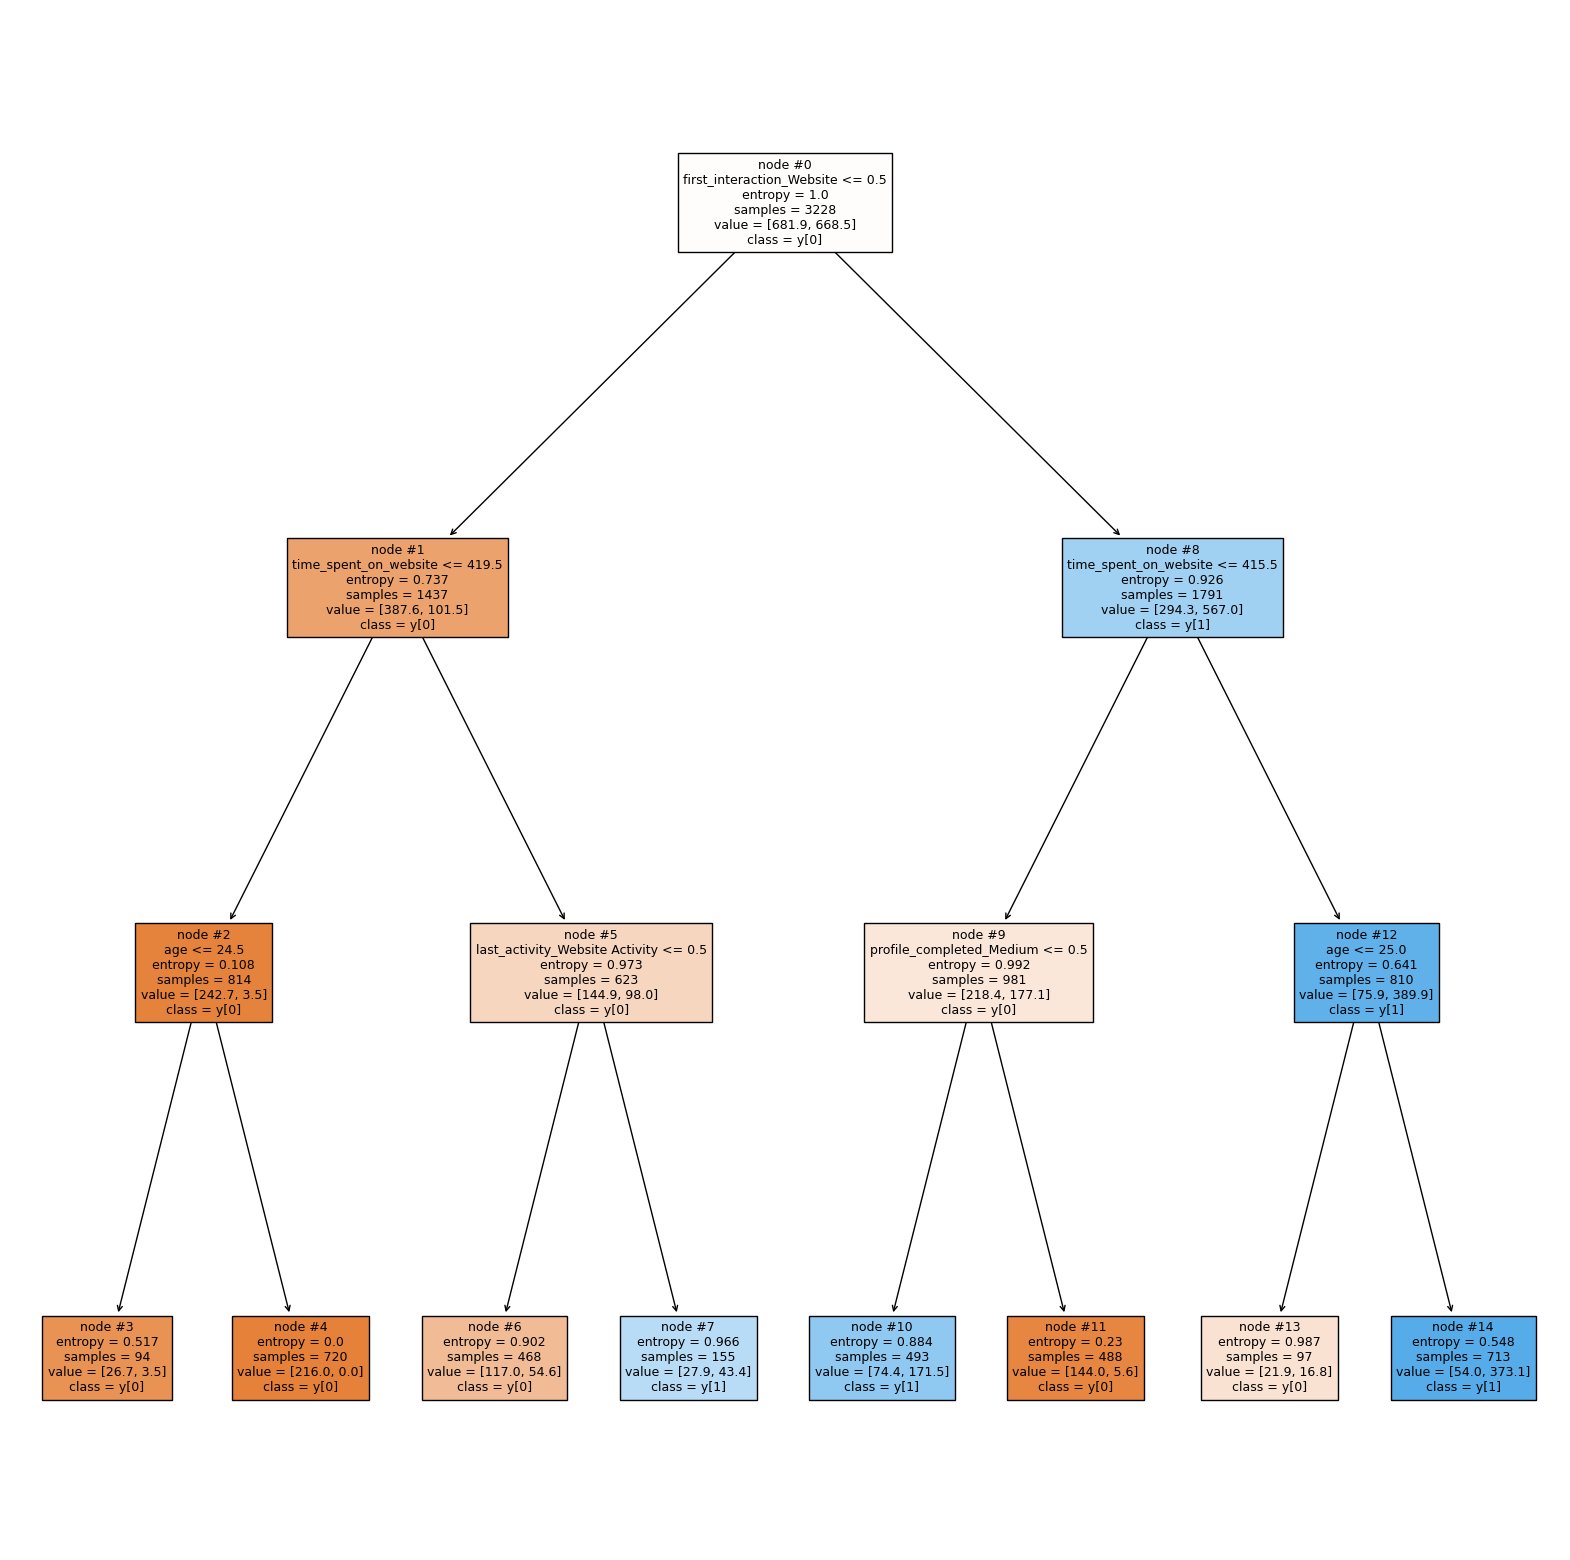

In [184]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Observations:**
* **The first split in the decision tree is at first_interaction_website** which implies that it is one of the most important factors in deciding whether the lead will convert or not.
* As per decision rules, customers whose first interaction was through the website, are more likely to convert into paid customers. 
* The leads whose first interaction is through the website and the time spent on website is at least 415 minutes are more likely to convert into paid customers. 
* The leads whose first interaction is through the website, the time spent on website is at least 415 minutes and they are more than 25 years old are more likely to convert into paid customers. 

**Let's look at the feature importance** of the tuned decision tree model

In [196]:
# Importance of features in the tree building
print ("Importance of features", pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

Importance of features                                    Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
print_media_type1              0.00000
print_media_type2              0.00000
digital_media                  0.00000
educational_channels           0.00000
referral                       0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000


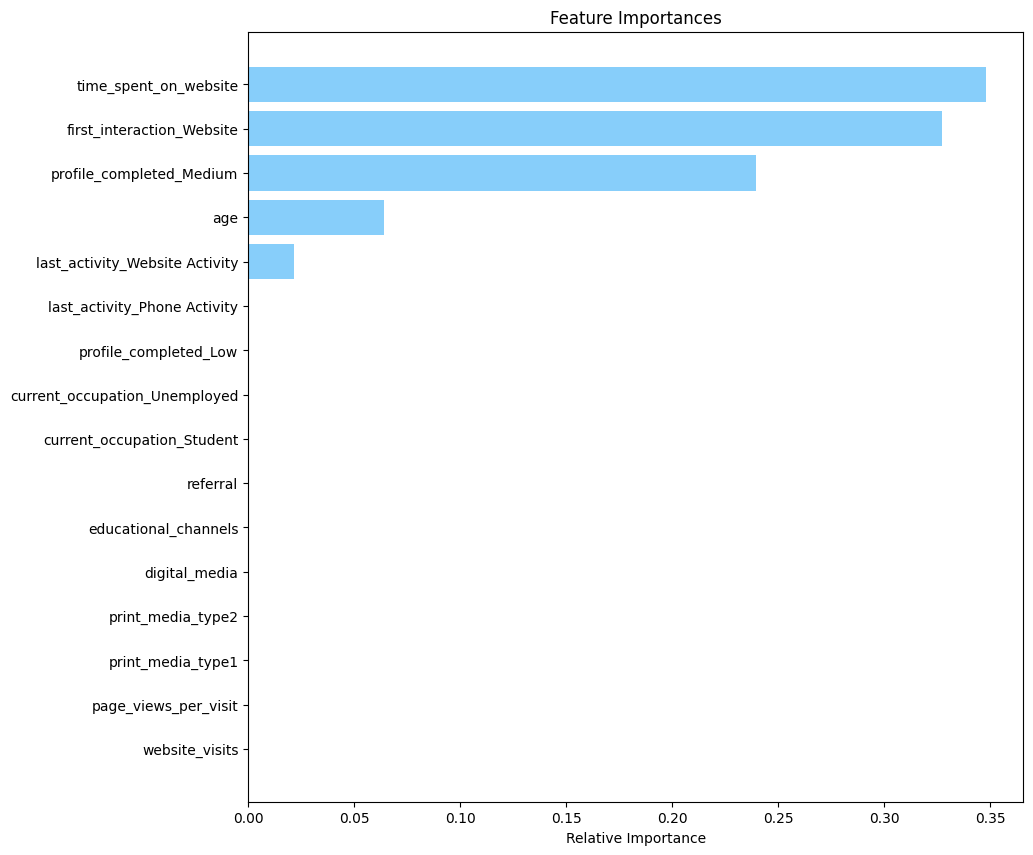

In [199]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'lightskyblue', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Remarkably, **The most relevant features are the time_spent_on_website and first_interaction_website, followed by profile_completed_medium, age, and last_website_activity**.
- It is clear that most of the website related features have an impact on the lead convertion. 
- **The remaining variables have negligible influence on this model's decision regarding lead conversion**.

Let's continue with the second model: **a random forest classifier.**

## Building a Random Forest model

In [187]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



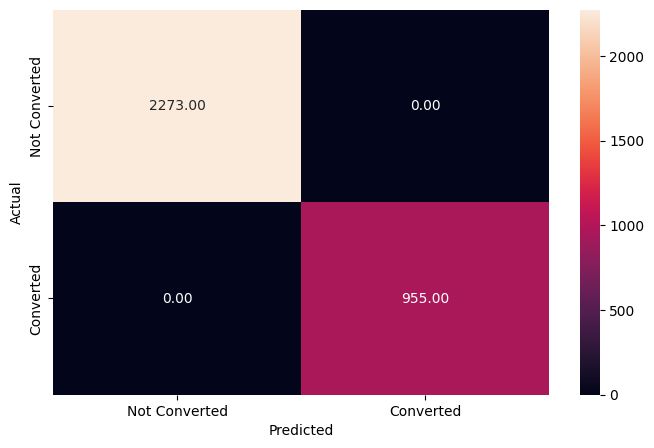

In [188]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**
* Much like the decision tree, **the random forest exhibits perfect performance on the training data.**
* It's highly probable that the model is experiencing overfitting, mirroring our previous observation with the decision tree.

**Let's confirm this by checking its performance on the testing data**

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.85      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



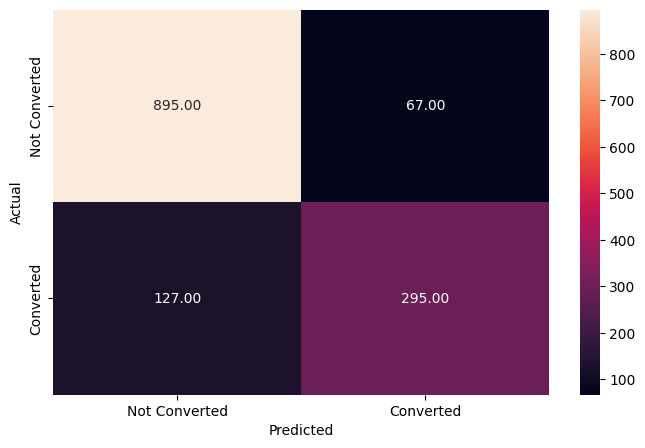

In [200]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
* In comparison to the Decision Tree, the outcomes achieved by the random forest classifier were decent on the testing datasets.
* However, the model suffers from **overfitting**.

**Let's s explore whether we can improve the model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

Based on our experience with decision trees, it's clear that **entropy** serves as a more effective splitting criterion for this dataset compared to the criterion hyperparameter.

In [201]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Parameters 
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [202]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      2273
           1       0.69      0.87      0.77       955

    accuracy                           0.85      3228
   macro avg       0.81      0.85      0.83      3228
weighted avg       0.87      0.85      0.85      3228



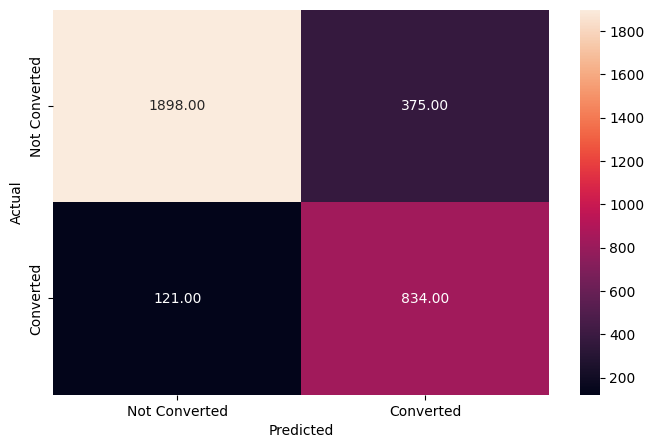

In [203]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
* **The recall score for class 1 has experienced a significant increment.**
* It's evident that the model's performance for class 1 recall has improved.

**Let's confirm this by checking its performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       962
           1       0.69      0.85      0.76       422

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.86      0.84      0.84      1384



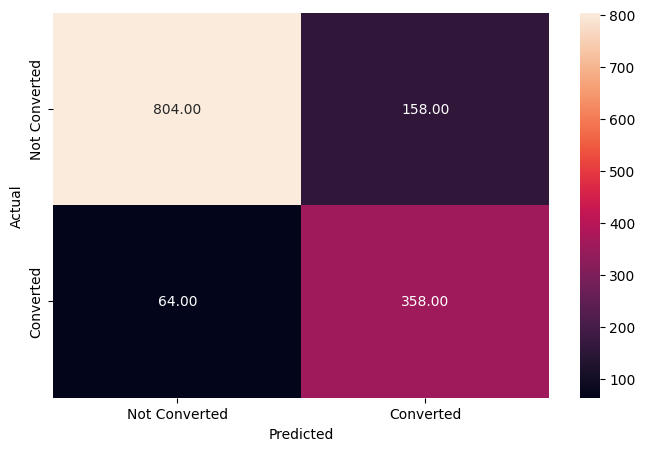

In [204]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:**
* **The recall score for class 1 has seen an increase**, although it has come at the expense of a reduction in precision.
* While the recall score for class 1 is comparable to that of the Decision Tree, the Random Forest demonstrates superior overall performance with higher precision and F1 scores for class 1. 
* This model can be potential model for **identifying** leads who will convert to paid customers.
* In the test dataset, 85% of the leads who converted were accurately predicted, only 15% were wrongly predicted.

**Let's look at the feature importance of the tuned random forest model.**

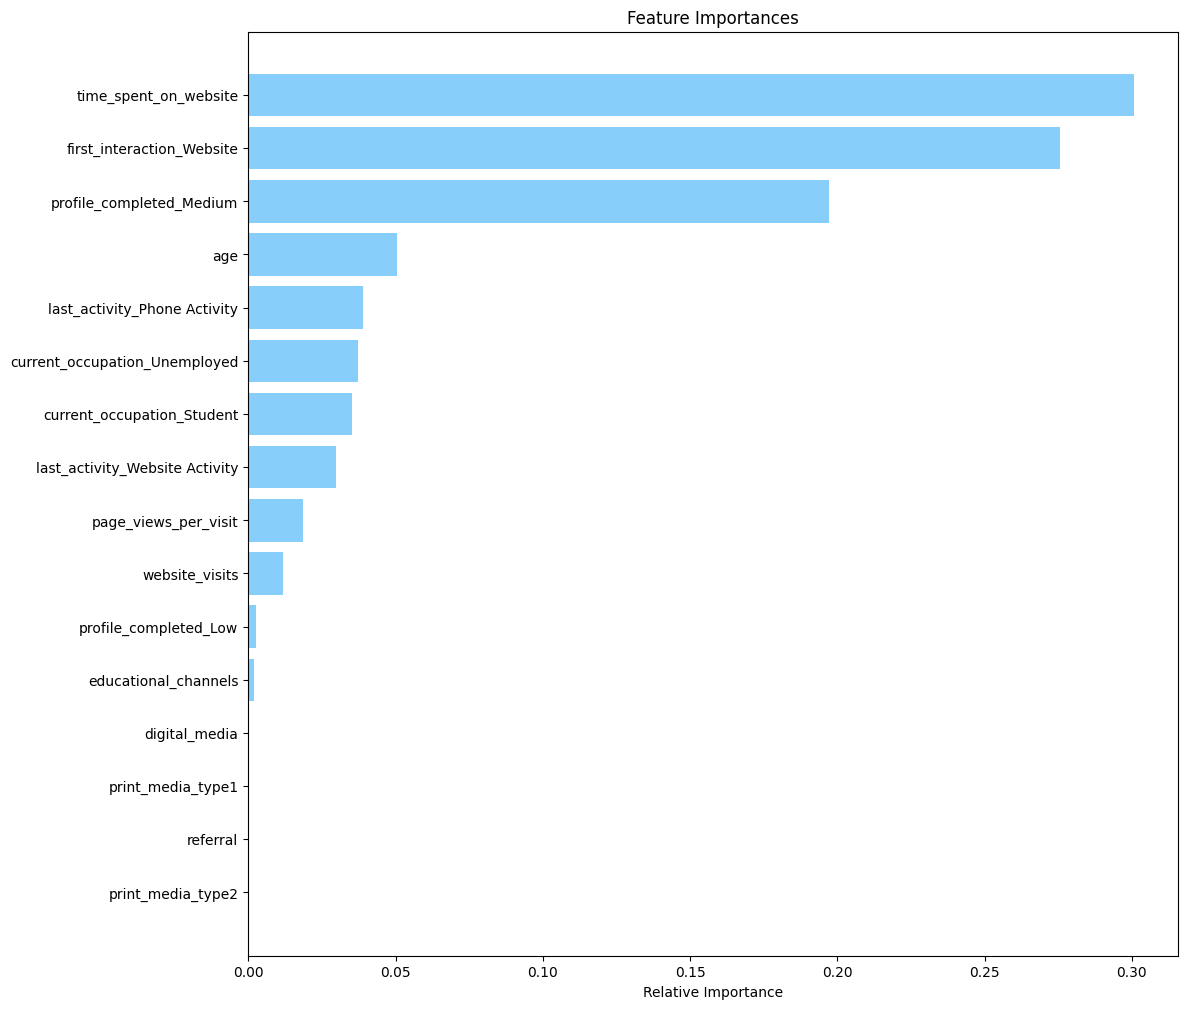

In [207]:
importances = rf_estimator_tuned_base.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'lightskyblue', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
* Similar to the decision tree model, **time_spent_on_website,first_interaction_website, profile_completed_Medium and age** are the top 4 most relevant features.
* The random forest also gave some importance to other variables like **last_activity_phone, current_occupation_unemployed, current_occupation_student, last_activity_website, page_views_per_visit and website_visits**
* The least two relevant features are **profile_completed_low and educational_channelst**
* **The remaining variables have no influence on this model's decision regarding lead conversion**.

## Actionable Insights and Recommendations

**Conclussions:**

* We have successfully developed tree-based models that can assist ExtraLearn in predicting which leads are likely to convert to paying customers. This insight will enable us to formulate effective marketing strategies.

* Both the finely tuned random forest model and the decision tree tuned model yield similar Recall scores, with values of 85% and 86%, respectively. However, the finely tuned random forest model outperforms in terms of macro average (84%) on the test data, and showcases higher precision and F1 scores.

* When assessing significant variables based on feature importance, we observe that time_spent_on_website, first_interaction_website, profile_completed_Medium, and age are the primary driving factors behind the model's predictions.

* The Decision Tree and Random Forest models exhibit signs of overfitting on the training data, achieving a Recall score of 100%. However, this performance drops to 70% on the test data. The tuned models provide a balanced and more generalized performance across both training and testing datasets.

* Using the tuned random forest model, which boasts an 85% Recall score along with well-balanced precision and F1 scores, ExtraLearn will have the capability to predict which leads will transition into paying customers. This strategic advantage will allow ExtraLearn to efficiently allocate resources while maintaining brand equity.


**Recommendations:**

1. The time spent on website can play a key role in identifying if a lead will convert to a paid customer or not. We observed that the leads that spent more than ~415 minutes on the website are more likely to convert. To increase the time of users on the website, Extralear could:
    * Improve Website Content: ensure that the website offers valuable and engaging content that is relevant to the target audience. This could include informative articles, videos, interactive tools, and educational resources.
    * Enhance User Experience: Focus on the user interface and user experience (UI/UX) design to make the website easy to navigate and visually appealing. A user-friendly website is more likely to keep visitors engaged.
    * Optimize Page Load Speed: Slow-loading pages can drive users away. Optimize the website's performance to ensure quick page load times.


2. The initial interaction a lead has, particularly if it occurs on the website, holds significant importance. In addition to enhancing the website to retain more customers, Extralearn should also prioritize the improvement of their mobile app services. This proactive approach will not only encourage users to transition into paid customers but also prevent the opposite outcome.
    * Regular Updates: Continuously update the app to fix bugs, add new features, and improve performance. Keep the app fresh and aligned with evolving user needs.
    * Personalization: Implement personalized recommendations and content based on user preferences and behavior within the app.
    * Push Notifications: Use push notifications strategically to remind users of upcoming classes, new content, and personalized recommendation


3. We saw in our analysis that leads with profile completition to a medium level or higher had higher chances of converting to paid customers. Extralearn should encourage the profile completition at least to a medium level by:
    * Profile Benefits: Clearly communicate the benefits of completing a profile to a medium level or higher. Explain how it can lead to a more personalized and rewarding learning journey.
    * Gamification: Gamify the profile completion process by offering rewards, badges, or points for reaching certain completion milestones. Users can earn incentives, such as access to premium content or discounts, upon achieving a medium-level profile completion.
    * Progress Tracking: Provide users with a progress tracker that shows how much of their profile is complete. Visualizing their progress can motivate users to complete missing sections.


4. Leads aged 25 and older exhibit a higher likelihood of converting into paid customers. Extralearn should consider tailoring its marketing campaigns toward a more mature customer demographic.


5. Our analysis shows that Professionals and unemployed leads are more likely to convert than Student leads. ExtraLearn should:
    * Targeted Marketing: Focus marketing efforts on professionals and unemployed individuals by creating targeted campaigns that address their specific needs and interests. Highlight how ExtraLearn's offerings can benefit their career development or personal growth. 
    * Promotions and Discounts: Offer promotions, discounts, or special incentives to attract and retain professionals and unemployed leads. This can include discounted course bundles or exclusive access to certain resources.
    * Job Placement Services: Consider offering job placement or career counseling services as part of ExtraLearn's offerings for unemployed leads. This added support can make ExtraLearn more attractive to this group.
    * Industry Partnerships: Collaborate with industry partners or organizations that cater to professionals and the unemployed. Such partnerships can help promote ExtraLearn's offerings to a relevant audience.




6. The EDA analysis showed that leads referred to the program are notably more likely to convert into paying customers compared to those acquired through other advertising methods. However, this trend was not prominently evident in the Decision Trees, likely because of the relatively small number of leads who were referred. To capitalize on this finding, Extralearn should consider implementing a referral program:
    * Rewards and Incentives: Offer attractive rewards or incentives to both the referrer and the referred lead. This could include discounts on courses, access to exclusive content, or monetary incentives.
    * Clear Communication: Clearly communicate the benefits of the referral program to existing customers and leads. Highlight how referring others can lead to valuable rewards and improved learning experiences.
    * Recognition: Recognize and celebrate top referrers or provide special recognition for achieving certain milestones in the program. 



7. Leads whose last interaction with ExtraaLearn was through the Website had a higher convertion rate than the email and phone activity one. Therefore, Extralearn should:
    * Customer Feedback: Gather feedback from converted customers who initially interacted through the website. Use their insights to improve the website and conversion process further
    Website Optimization: Continuously optimize the website to provide an engaging and seamless user experience. Ensure that it offers valuable content and resources that encourage visitors to convert into paying customers.
    * Email Follow-Ups: For leads who interacted through email activities, develop targeted email follow-up sequences that nurture them toward conversion. Provide valuable content and incentives to encourage action.

